# Binary classification

## Synthetic example

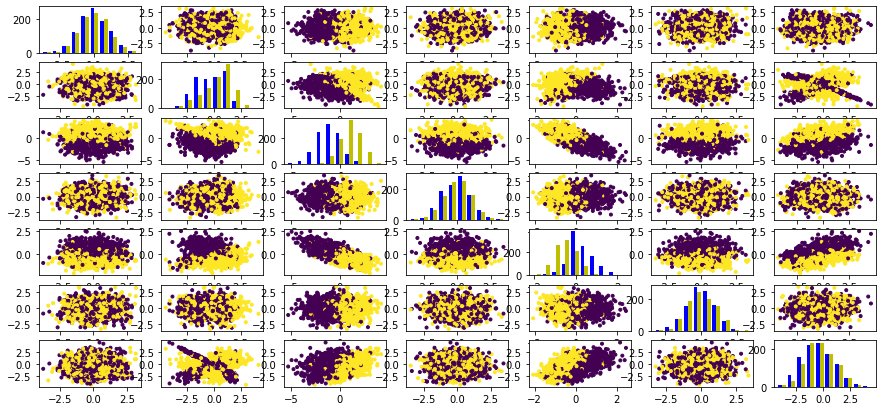

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from pycalib.models import CalibratedClassifierCV

n_features = 7
X, y = datasets.make_classification(n_classes=2, n_samples=10000,
                                    n_clusters_per_class=3,
                                    n_features=n_features,
                                    n_informative=int(n_features/2),
                                    n_redundant=int(n_features/4),
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

fig = plt.figure(figsize=(15, 7))
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, 1 + i + j*n_features)
        if i == j:
            x_per_class = [X_train[np.where(y_train == this_class)[0],i] for this_class in np.unique(y_train)]
            ax.hist(x_per_class, color=['b', 'y'])
        else:
            ax.scatter(X_train[:,i], X_train[:,j], c=y_train, marker='.')

# Reliability diagram

## Questions

- Reliability diagram in 1 class only considers positive class. While it is possible to create the multiclass by flattening the binarized true labels and predictions. This makes the histogram in the multiclass case much prominent in the lower end of the predicted values. Would this be fine?
- If we addopt the previously proposed method for multiclass, does it make sense to use the same approach for binary problems by flattening the 2 class binarized matrix, instead of ussing only the positive class?

- TODO add this plot_reliability_diagram to the PyCalib library, or refactor the current one

(8000, 1)


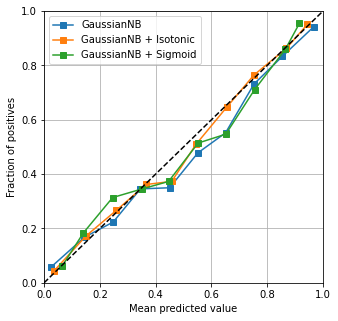

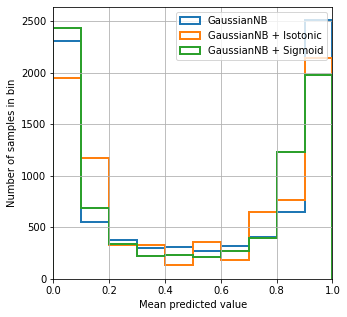

In [2]:
from pycalib.visualisations import plot_reliability_diagram

estimators = [(GaussianNB(), 'GaussianNB'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='isotonic'), 'GaussianNB + Isotonic'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='sigmoid'), 'GaussianNB + Sigmoid')
             ]

legend = [aux[1] for aux in estimators]
scores = []
for clf, name in estimators:
    clf.fit(X_train, y_train)
    scores.append(clf.predict_proba(X_test))
    
    
_ = plot_reliability_diagram(y_test, scores, legend=legend, histogram=True)

# Calibration map

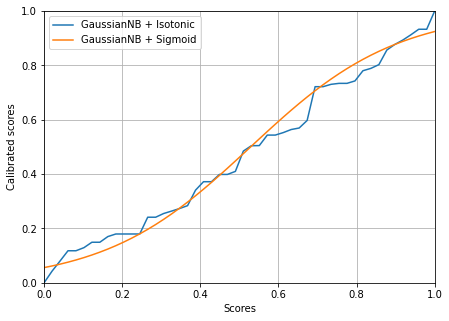

In [3]:
scores_linspace = np.linspace(0, 1, 50)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
for clf, name in estimators:
    if not hasattr(clf, 'calibrated_classifiers_'):
        continue
    classifiers = clf.calibrated_classifiers_
    calibrated = np.mean([cla.calibrators_[0].predict(scores_linspace) for cla in classifiers], axis=0)
    ax.plot(scores_linspace, calibrated, label=name)
ax.legend()
ax.set_xlabel('Scores')
ax.set_ylabel('Calibrated scores')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid()

# Reliability diagram discrepancy

## Questions

- There are at least 4 ways to create the red gaps. Between (1) the mean predicted scores inside the bin, or (2) the center of the bin and the expected proportion of positives in the center of the bin. Similarly, the end of the gap could be to (3) the expected proportions in the center of the bin, or to (4) the point in which a vertical line from the predicted mean value inside the bin intersects with the diagonal.

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])


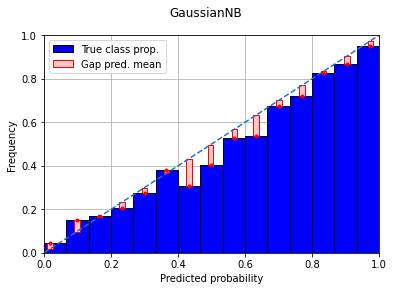

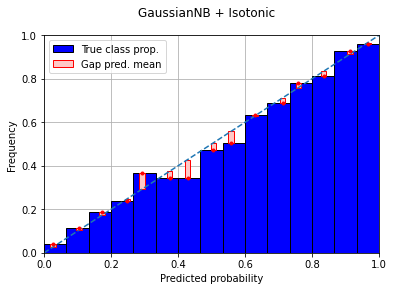

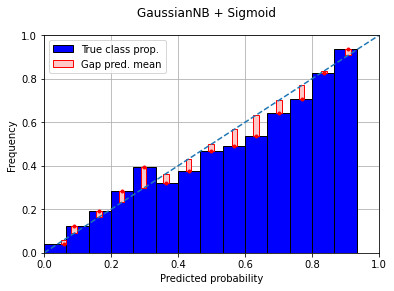

In [4]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps

for clf, name in estimators:
    est_scores = clf.predict_proba(X_test)
    fig = plot_multiclass_reliability_diagram_gaps(y_test, est_scores[:, 1], n_bins=15)
    fig.suptitle(name)

# Ternary classification

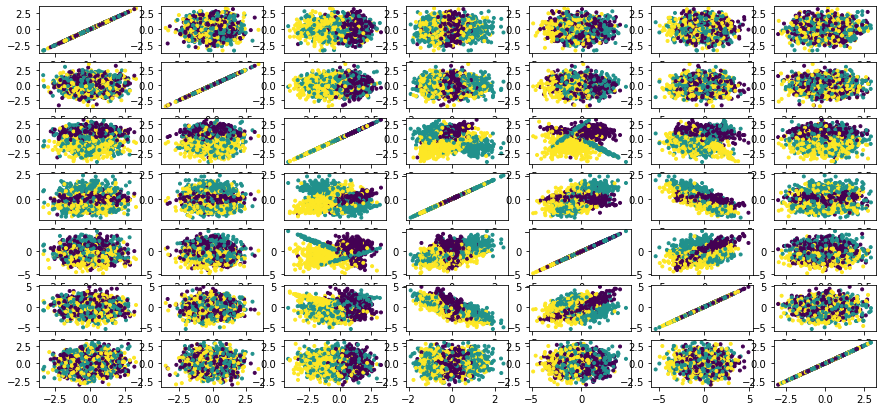

In [5]:
n_features = 7
X, y = datasets.make_classification(n_classes=3, n_samples=10000,
                                    n_clusters_per_class=2,
                                    n_features=n_features,
                                    n_informative=int(n_features/2),
                                    n_redundant=int(n_features/4),
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,
                                                    random_state=42)

fig = plt.figure(figsize=(15, 7))
for i in range(n_features):
    for j in range(n_features):
        ax = fig.add_subplot(n_features, n_features, 1 + i + j*n_features)
        plt.scatter(X_train[:,i], X_train[:,j], c=y_train, marker='.')

# Reliability diagram

## Question

- Can be implemented by flattening all the classes and predictions into an array (current implementation). We could also perform the confidence reliability diagram. Should we implement that one?

- TODO by default do class by class
- TODO add confidence reliability diagram

(8000, 3)


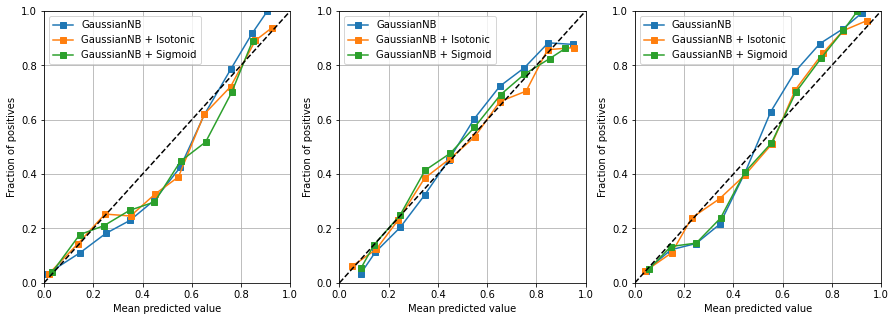

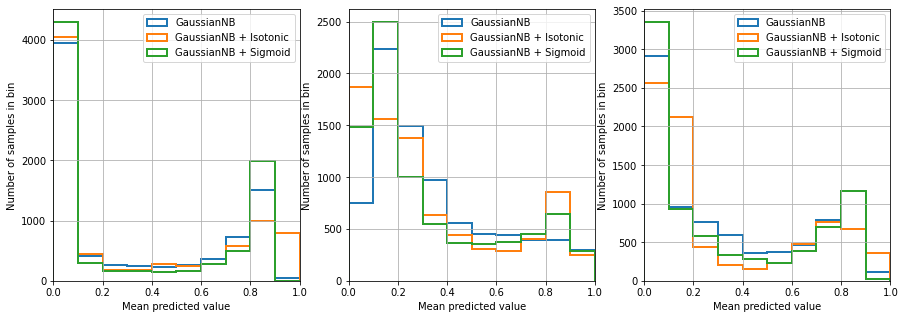

In [6]:
estimators = [(GaussianNB(), 'GaussianNB'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='isotonic'), 'GaussianNB + Isotonic'),
              (CalibratedClassifierCV(GaussianNB(), cv=4, method='sigmoid'), 'GaussianNB + Sigmoid')
             ]

legend = [aux[1] for aux in estimators]
scores = []
for clf, name in estimators:
    clf.fit(X_train, y_train)
    scores.append(clf.predict_proba(X_test))
    
    
_ = plot_reliability_diagram(y_test, scores, legend=legend, histogram=True)

# Calibration map



/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


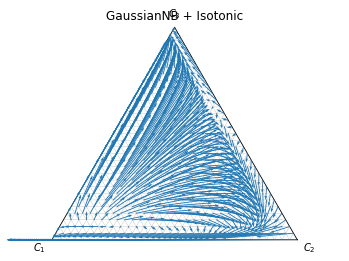

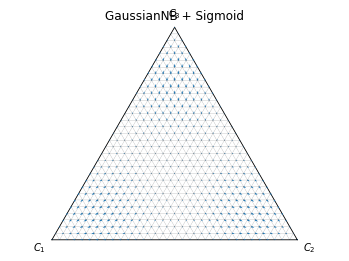

In [7]:
from pycalib.visualisations.barycentric import draw_calibration_map
from pycalib.visualisations.barycentric import get_mesh_bc
from pycalib.models import CalibratedModel

from dirichletcal import FullDirichletCalibrator, FixedDiagonalDirichletCalibrator, DirichletCalibrator

estimators = [(GaussianNB(), 'GaussianNB'),
              (CalibratedModel(GaussianNB(), method=FullDirichletCalibrator()), 'GaussianNB + Isotonic'),
              (CalibratedModel(GaussianNB(), method=FixedDiagonalDirichletCalibrator()), 'GaussianNB + Sigmoid')
             ]

for clf, name in estimators:
    clf.fit(X_train, y_train)


P_bc_grid = get_mesh_bc(subdiv=5)

for clf, name in estimators:
    if not hasattr(clf, 'calibrator'):
        continue
    calibrated = clf.calibrator.predict(P_bc_grid)
    draw_calibration_map(P_bc_grid, calibrated)
    plt.title(name)

# Multiclass classification

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/scipy/sparse/base.py:585: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/scipy/sparse/base.py:585: RuntimeWarning: divide by zero encountered in true_divide
  return self.astype(np.float_)._mul_scalar(1./other)
/home/miquel/git/uob/classifier-calibration/hands_on/lib/PyCalib/pycalib/visualisations/__init__.py:138: RuntimeWarning: Mean of empty slice
  pred_mean[i] = np.nanmean(p_pred[bin_indices])


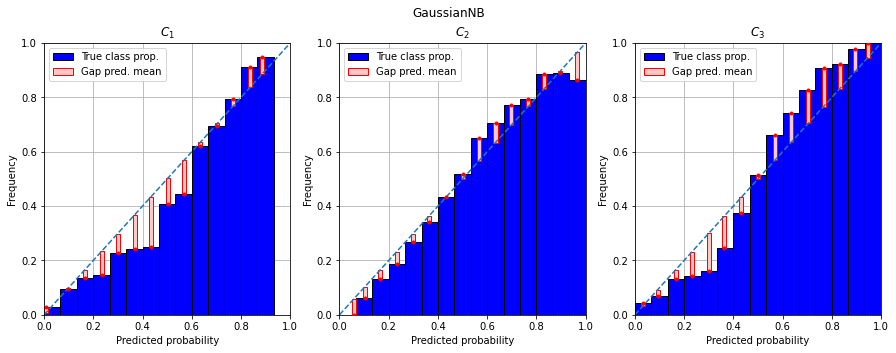

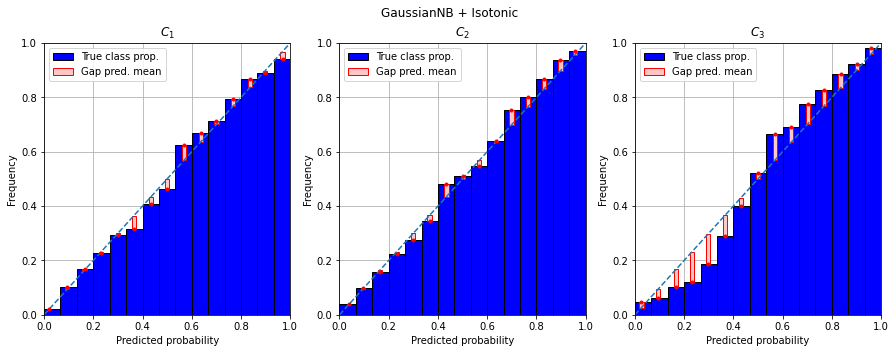

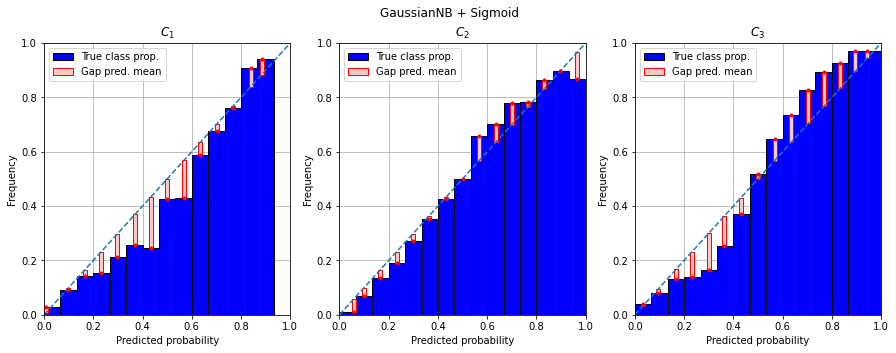

In [9]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps_per_class

for clf, name in estimators:
    est_scores = clf.predict_proba(X_test)
    fig = plt.figure(figsize=(15,5))
    fig = plot_multiclass_reliability_diagram_gaps_per_class(y_test, est_scores, n_bins=15, fig=fig)
    fig.suptitle(name)
    